In [1]:
# %pip install pandas seaborn

In [2]:
# df_old.columns

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.ticker import FuncFormatter

# Funktionen für Farb- und Designanpassung
def get_colors():
    return np.array([
        [0.1, 0.1, 0.1],          # Schwarz
        [0.4, 0.4, 0.4],          # Sehr dunkles Grau
        [0.7, 0.7, 0.7],          # Dunkles Grau
        [0.9, 0.9, 0.9],          # Helles Grau
        [0.984375, 0.7265625, 0], # Dunkelgelb
        [1, 1, 0.9]               # Hellgelb
    ])

def color_bars(ax, colors):
    dark_color = colors[2]
    for p in ax.patches:
        p.set_edgecolor(dark_color)

def set_style(font_scale=1.0, style_rc=None):
    sns.set_context("paper")
    sns.set(font='serif', font_scale=font_scale, rc=style_rc)
    sns.set_style('whitegrid', {
        'axes.edgecolor': '.0', 
        'grid.linestyle': u'--',
        'grid.color': '.8', 
        'xtick.color': '.15',
        'xtick.minor.size': 3.0, 
        'xtick.major.size': 6.0, 
        'ytick.color': '.15', 
        'ytick.minor.size': 3.0, 
        'ytick.major.size': 6.0,
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
    custom_colors = get_colors()
    sns.set_palette(custom_colors)

def to_percent(y, position):
    s = str(round(100 * y))
    if matplotlib.rcParams['text.usetex']:
        return s + r'$\%$'
    else:
        return s + '%'


In [4]:

# Plot function
def plot_comparison(data_to_plot):
    fig, axs = plt.subplots(1, 4, figsize=(18, 6))
    categories = list(data_to_plot.keys())
    
    for i, category in enumerate(categories):
        data = [data_to_plot[category][lang] for lang in query_languages]
        bp = axs[i].boxplot(data, patch_artist=True, labels=query_languages)
        
        for patch, color in zip(bp['boxes'], query_language_colors.values()):
            patch.set_facecolor(color)
        
        axs[i].set_xlabel('Query Language')
        axs[i].set_ylabel(category)
        axs[i].set_title(f'Comparison of {category}')
        axs[i].grid(True)

    # Add a super title to the figure
    fig.suptitle('Comparison of Query Languages: Cypher, SPARQL, and SQL', fontsize=16)
    
    # Add a shorter line under the title
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    #plt.savefig('C:/Users/Sithu/Documents/GitHub/SOMMED-QA/src/main/solutions/plots/comparisonplot_cypher_sparql_sql.pdf')
    plt.show()



In [5]:
df_dev = pd.read_csv("dev.csv")
df_dev["dataset"] = "dev"
df_test = pd.read_csv("test.csv")
df_test["dataset"] = "test"


In [6]:
df = pd.concat([df_dev, df_test], ignore_index=True)
df.columns

Index(['question', 'sparql', 'sql', 'cypher', 'mql', 'question_type', 'class',
       'cypher_results', 'cypher_query_time', 'sparql_results',
       'sparql_query_time', 'sql_results', 'sql_query_time', 'mql_results',
       'mql_query_time', 'dataset'],
      dtype='object')

In [7]:
df.groupby(["dataset", "class"]).count()

question  sparql  sql  cypher  mql  \
dataset class                                                          
dev     allergies                      240     240  240     240  240   
        careplans                       83      83   83      83   83   
        claims                          64      64   64      64   64   
        claims_transactions             52      52   52      52   52   
        conditions                      51      51   51      51   51   
        devices                         70      70   70      70   70   
        encounters                      92      92   92      92   92   
        imaging_studies                214     214  214     214  214   
        immunizations                   76      76   76      76   76   
        medications                     91      91   91      91   91   
        observations                    89      89   89      89   89   
        organizations                   91      91   91      91   91   
        patients                       219     219  219     219  219   
        payers                         231     231  231     231  231   
        procedures                     114     114  114     114  114   
        providers                       94      94   94      94   94   
        supplies                        70      70   70      70   70   
        unanswerable_medical            40      40   40      40   40   
        unanswerable_non_medical        19      19   19      19   19   
test    allergies                      233     233  233     233  233   
        careplans                       88      88   88      88   88   
        claims                          68      68   68      68   68   
        claims_transactions             60      60   60      60   60   
        conditions                      63      63   63      63   63   
        devices                         77      77   77      77   77   
        encounters                      85      85   85      85   85   
        imaging_studies                234     234  234     234  234   
        immunizations                   72      72   72      72   72   
        medications                     94      94   94      94   94   
        observations                   101     101  101     101  101   
        organizations                   69      69   69      69   69   
        patients                       220     220  220     220  220   
        payers                         234     234  234     234  234   
        procedures                     100     100  100     100  100   
        providers                       82      82   82      82   82   
        supplies                        65      65   65      65   65   
        unanswerable_medical            34      34   34      34   34   
        unanswerable_non_medical        21      21   21      21   21   

                                  question_type  cypher_results  \
dataset class                                                     
dev     allergies                           240             240   
        careplans                            83              83   
        claims                               64              64   
        claims_transactions                  52              52   
        conditions                           51              51   
        devices                              70              70   
        encounters                           92              92   
        imaging_studies                     214             214   
        immunizations                        76              76   
        medications                          91              91   
        observations                         89              89   
        organizations                        91              91   
        patients                            219             219   
        payers                              231             231   
        procedures                          114             114   
        provid

In [8]:
count_df = df.groupby(["dataset", "class"]).count().reset_index()
count_df = count_df.rename(columns={count_df.columns[-1]: "value"})
count_df = count_df[["dataset", "class", "value"]]

In [9]:
count_df = count_df.rename(columns={
    "class": "name",
    "dataset": "group"
})

In [10]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 2
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 



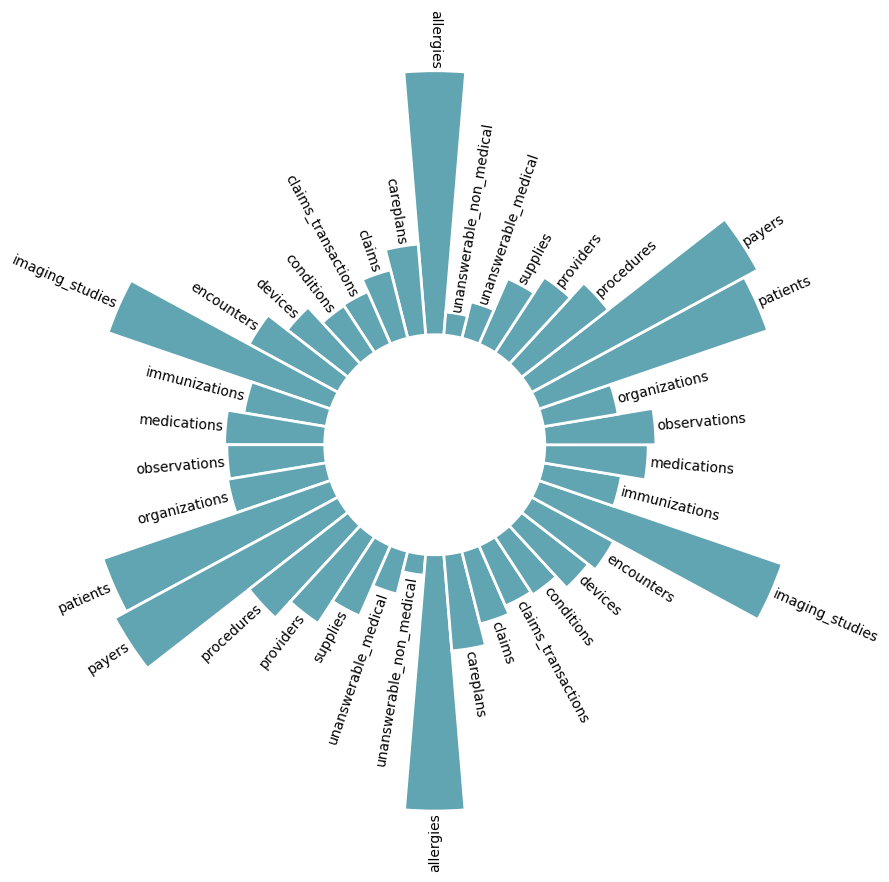

In [11]:
ANGLES = np.linspace(0, 2 * np.pi, len(count_df), endpoint=False)
VALUES = count_df["value"].values
LABELS = count_df["name"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 250)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

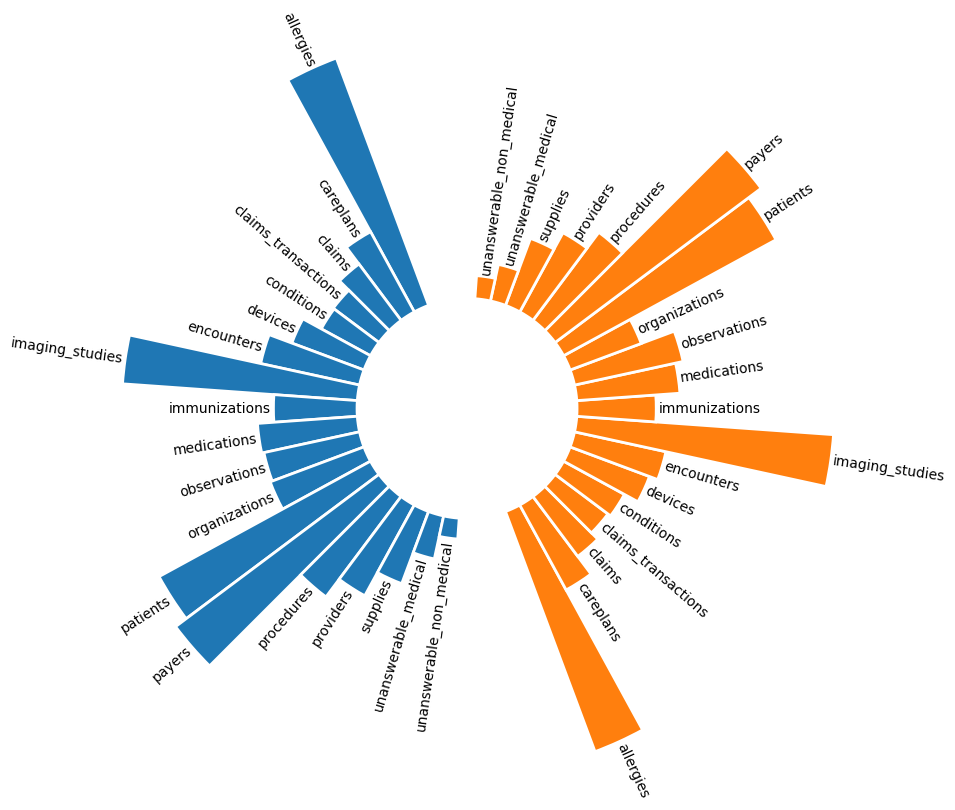

In [12]:
# Grab the group values
GROUP = count_df["group"].values

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtain size of each group
GROUPS_SIZE = [len(i[1]) for i in count_df.groupby("group")]

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 250)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [len(i[1]) for i in count_df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

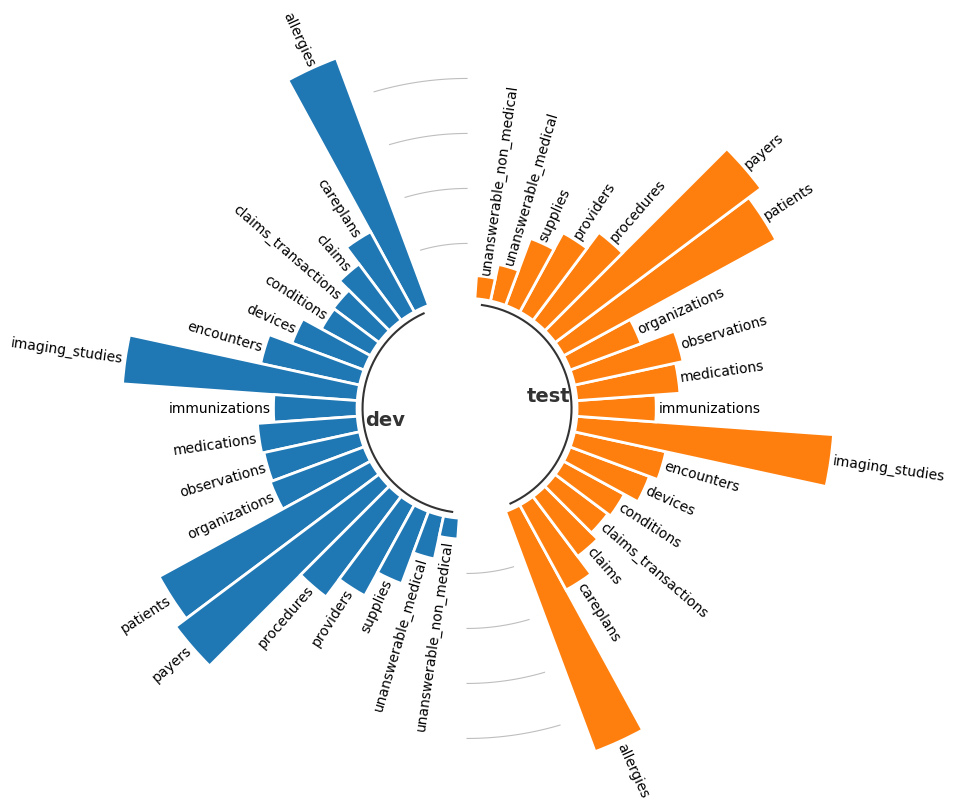

In [13]:
# All this part is like the code above
VALUES = count_df["value"].values
LABELS = count_df["name"].values
GROUP = count_df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in count_df.groupby("group")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 250)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in count_df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# # Add counts inside the bars
# for bar, value in zip(bars, VALUES):
#     ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, str(value),
#             ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["dev", "test"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -25, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 50, 100, 150, and 200
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [50] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [100] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [150] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [200] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

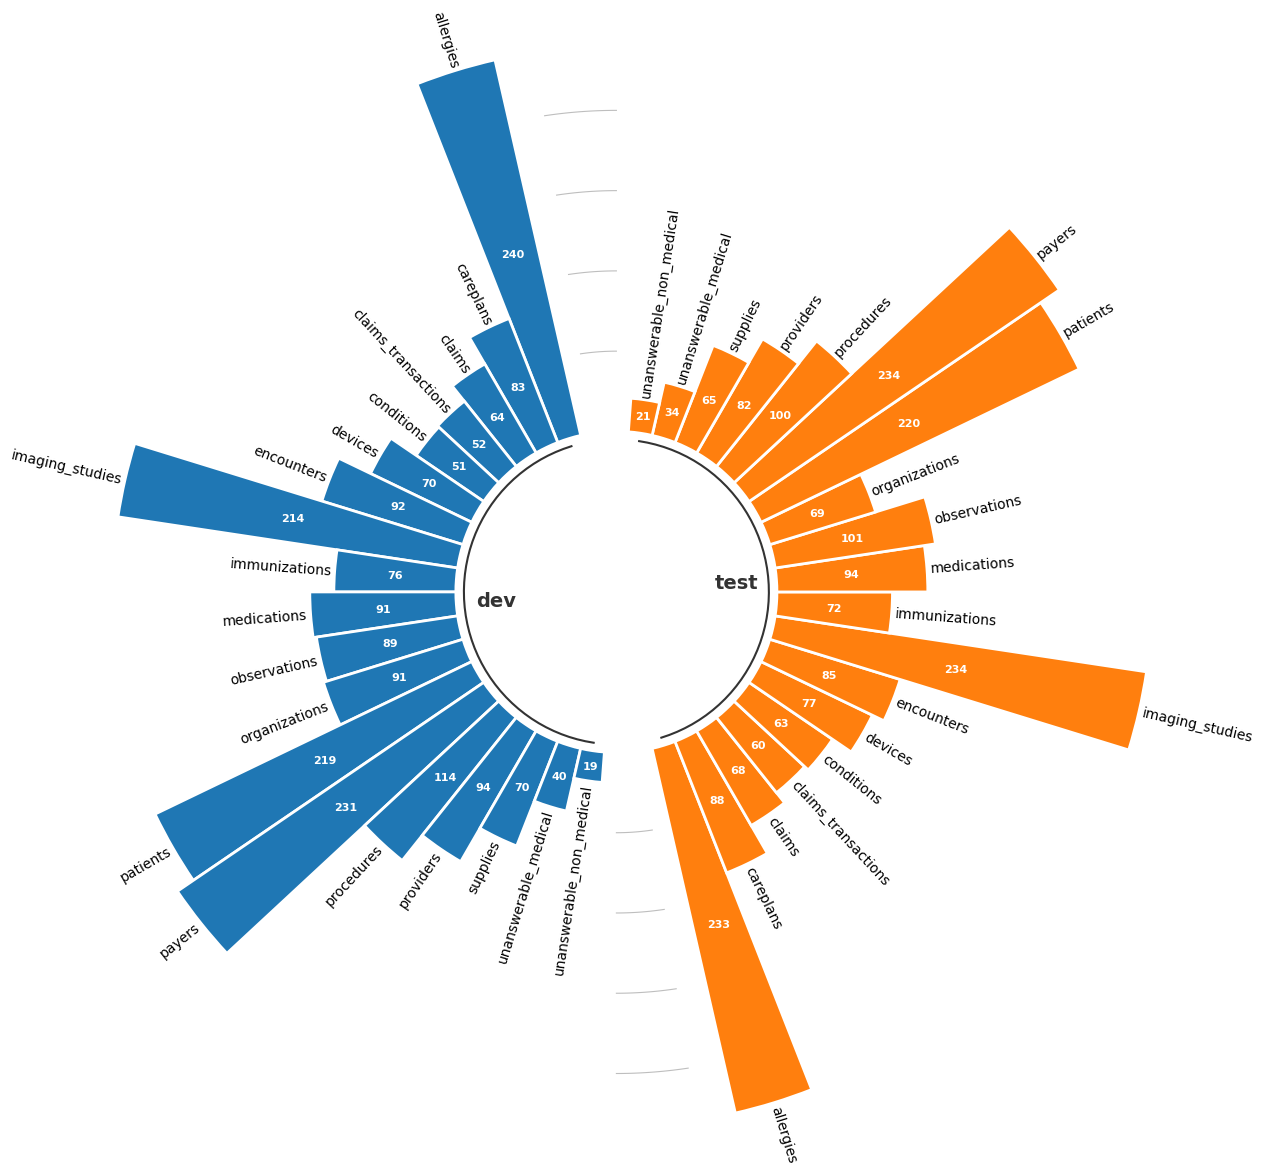

In [14]:
# All this part is like the code above
VALUES = count_df["value"].values
LABELS = count_df["name"].values
GROUP = count_df["group"].values
PAD = 2
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
GROUPS_SIZE = [len(i[1]) for i in count_df.groupby("group")]
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD
fig, ax = plt.subplots(figsize=(16, 12), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 250)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])
GROUPS_SIZE = [len(i[1]) for i in count_df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]
bars = ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)
add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Add counts inside the bars
for i, (angle, value) in enumerate(zip(ANGLES[IDXS], VALUES)):
    if i < len(VALUES):
        ax.text(angle, value / 2, str(value), ha='center', va='center',
                color='white', fontsize=8, fontweight='bold')

# Extra customization below here --------------------
# This iterates over the sizes of the groups adding reference
# lines and annotations.
offset = 0 
for group, size in zip(["dev", "test"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -25, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 50, 100, 150, and 200
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [50] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [100] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [150] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [200] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD
fig.tight_layout()
fig.savefig("dataset_classes.pdf", bbox_inches='tight')

In [15]:
df_melted1 = pd.melt(df, id_vars=['question', 'question_type', 'class', 'dataset'],
                    value_vars=['sparql', 'sql', 'cypher', 'mql'],
                    var_name='query_language', value_name='query')

In [16]:
df_melted1


,question,question_type,class,dataset,query_language,query
0,Please provide names of the patients that are ...,nonWH,organizations,dev,sparql,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...
1,Who is the patient associated with the claim c...,WH,claims,dev,sparql,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...
2,Please provide me the number of medications co...,nonWH,payers,dev,sparql,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...
3,Is Sithu2412 Siva2309 a donor?,nonWH,unanswerable_medical,dev,sparql,No answer possible based on given input
4,What is the ethnicity of the patient named Bri...,WH,patients,dev,sparql,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...
...,...,...,...,...,...,...
15995,Please provide me the patients with the care p...,nonWH,careplans,test,mql,"db.patients.aggregate([ { $match: {""ENCOUNT..."
15996,In which encounter ID was the care plan with c...,WH,careplans,test,mql,"db.patients.aggregate([ { $match: {""ENCOUNT..."
15997,Please provide me the encounters that are rela...,nonWH,devices,test,mql,"db.patients.aggregate([{$unwind: ""$ENCOUNTERS""..."
15998,What is the address of the provider named Alan...,WH,providers,test,mql,"db.providers.find({ ""NAME"": ""Alan320 Keeling57..."


In [17]:
df_melted2 = pd.melt(df, id_vars=['question', 'question_type', 'class', 'dataset'],
                    value_vars=['sparql_results', 'sql_results', 'cypher_results', 'mql_results'],
                    var_name='temp', value_name='query_results')

In [18]:
df_melted3 = pd.melt(df, id_vars=['question', 'question_type', 'class', 'dataset'],
                    value_vars=['sparql_query_time', 'sql_query_time', 'cypher_query_time', 'mql_query_time'],
                    var_name='temp', value_name='query_time')

In [19]:
df_melted3

,question,question_type,class,dataset,temp,query_time
0,Please provide names of the patients that are ...,nonWH,organizations,dev,sparql_query_time,0.016862
1,Who is the patient associated with the claim c...,WH,claims,dev,sparql_query_time,0.014710
2,Please provide me the number of medications co...,nonWH,payers,dev,sparql_query_time,0.015087
3,Is Sithu2412 Siva2309 a donor?,nonWH,unanswerable_medical,dev,sparql_query_time,NaN
4,What is the ethnicity of the patient named Bri...,WH,patients,dev,sparql_query_time,0.015023
...,...,...,...,...,...,...
15995,Please provide me the patients with the care p...,nonWH,careplans,test,mql_query_time,0.499411
15996,In which encounter ID was the care plan with c...,WH,careplans,test,mql_query_time,0.491818
15997,Please provide me the encounters that are rela...,nonWH,devices,test,mql_query_time,0.529357
15998,What is the address of the provider named Alan...,WH,providers,test,mql_query_time,0.484407


In [20]:
merged_df = df_melted1.join(df_melted2[["query_results"]]).join(df_melted3[["query_time"]])
merged_df

,question,question_type,class,dataset,query_language,query,query_results,query_time
0,Please provide names of the patients that are ...,nonWH,organizations,dev,sparql,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,"{'head': {'vars': ['first', 'last']}, 'results...",0.016862
1,Who is the patient associated with the claim c...,WH,claims,dev,sparql,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,"{'head': {'vars': ['first', 'last']}, 'results...",0.014710
2,Please provide me the number of medications co...,nonWH,payers,dev,sparql,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,"{'head': {'vars': ['coveredMedications']}, 're...",0.015087
3,Is Sithu2412 Siva2309 a donor?,nonWH,unanswerable_medical,dev,sparql,No answer possible based on given input,NaN,NaN
4,What is the ethnicity of the patient named Bri...,WH,patients,dev,sparql,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,"{'head': {'vars': ['ethnicity']}, 'results': {...",0.015023
...,...,...,...,...,...,...,...,...
15995,Please provide me the patients with the care p...,nonWH,careplans,test,mql,"db.patients.aggregate([ { $match: {""ENCOUNT...",[],0.499411
15996,In which encounter ID was the care plan with c...,WH,careplans,test,mql,"db.patients.aggregate([ { $match: {""ENCOUNT...",[],0.491818
15997,Please provide me the encounters that are rela...,nonWH,devices,test,mql,"db.patients.aggregate([{$unwind: ""$ENCOUNTERS""...",[ { encounter_description: 'Admission to hospi...,0.529357
15998,What is the address of the provider named Alan...,WH,providers,test,mql,"db.providers.find({ ""NAME"": ""Alan320 Keeling57...",[ { ADDRESS: '225 BOSTON ST' } ],0.484407


In [21]:
formatter = FuncFormatter(to_percent)
# Data processing and calculation
# df_train = pd.read_csv("processed_train.csv")
df = merged_df[~merged_df["class"].isin(['unanswerable_medical', 'unanswerable_non_medical'])].copy()


In [22]:
def count_distinct_vars(row):
    query = row['query']
    query_language = row['query_language']
    
    if query_language == 'cypher':
        distinct_vars = len(set(re.findall(r'\((\w):\[A-Z\]', query)))
    elif query_language == 'sparql':
        distinct_vars = len(set(re.findall(r'\?\w+', query)))
    elif query_language == 'sql':
        distinct_vars = len(set(re.findall(r'\b[A-Za-z\_]+\.\b[A-Za-z\_]+\b', query)))
    elif query_language == 'mql':
        distinct_vars = len(set(re.findall(r'\$\w+', query)))
    else:
        raise
    
    return distinct_vars


    
def count_keywords(row):
    cypher_keywords = r'\b(MATCH|RETURN|WHERE|AND|OR|CREATE|DELETE|SET|WITH|LIMIT|COUNT|DISTINCT|OPTIONAL|SKIP|ORDER BY|UNWIND|MERGE|CASE|WHEN|THEN|ELSE|END|AS|IS NULL|IS NOT NULL|STARTS WITH|ENDS WITH|CONTAINS)\b'
    sparql_keywords = r'\b(SELECT|WHERE|FILTER|LIMIT|OFFSET|ORDER BY|GROUP BY|UNION|OPTIONAL|GRAPH|COUNT|PREFIX|DISTINCT|ASK|CONSTRUCT|DESCRIBE|FROM|NAMED|BASE|PREFIX|REDUCED|BIND|VALUES|SERVICE|MINUS|EXISTS|NOT EXISTS|IF|COALESCE|SAMPLE|GROUP_CONCAT|HAVING)\b'
    sql_keywords = r'\b(SELECT|FROM|WHERE|JOIN|INNER JOIN|LEFT JOIN|RIGHT JOIN|FULL OUTER JOIN|CROSS JOIN|ON|GROUP BY|HAVING|ORDER BY|LIMIT|OFFSET|INSERT|UPDATE|DELETE|COUNT|DISTINCT|AS|UNION|INTERSECT|EXCEPT|IN|NOT IN|LIKE|BETWEEN|IS NULL|IS NOT NULL|EXISTS|ANY|ALL|CASE|WHEN|THEN|ELSE|END|ASC|DESC|AND|OR|OVER|PARTITION BY)\b'
    mql_keywords = r'\b(find|findOne|insert|insertOne|insertMany|update|updateOne|updateMany|replace|replaceOne|delete|deleteOne|deleteMany|count|distinct|sort|limit|skip|aggregate|group|match|project|unwind|lookup|out|indexStats|geoNear|geoSearch|text|where|expr|jsonSchema|mod|regex|options|size|all|elemMatch|slice|bitsAllClear|bitsAllSet|bitsAnyClear|bitsAnySet|comment|meta|explain|hint|maxTimeMS|max|min|returnKey|showDiskLoc|snapshot|natural|caseSensitive|diacriticSensitive)\b'

    query = row['query']
    query_language = row['query_language']
    
    if query_language == 'cypher':
        keywords = len(re.findall(cypher_keywords, query, re.IGNORECASE))
    elif query_language == 'sparql':
        keywords = len(re.findall(sparql_keywords, query, re.IGNORECASE))
    elif query_language == 'sql':
        keywords = len(re.findall(sql_keywords, query, re.IGNORECASE))
    elif query_language == 'mql':
        keywords = len(re.findall(mql_keywords, query, re.IGNORECASE))
    else:
        raise
    
    return keywords


import re

def count_sparql_triples_complex(query):
    # Remove comments
    query = re.sub(r'#.*', '', query)

    # Replace string literals with placeholders
    query = re.sub(r'"""(?:[^"]|"")*"""|"(?:[^"]|\\")*"', '_STRING_', query)

    # Split the query into tokens
    tokens = re.findall(r'<[^>]+>|\?[a-zA-Z0-9_]+|_STRING_|\w+:|[()]|\.|\{|\}|;|,', query)

    # Initialize variables
    triple_count = 0
    stack = []
    in_bgp = False

    # Iterate through the tokens
    for token in tokens:
        if token == '{':
            stack.append('{')
            in_bgp = True
        elif token == '}':
            stack.pop()
            if not stack:
                in_bgp = False
        elif in_bgp:
            if token in ['.', ';']:
                triple_count += 1
            elif token == ',':
                triple_count += 1
        elif token == '(':
            stack.append('(')
        elif token == ')':
            stack.pop()

    return triple_count

# SPARQL triple patterns
def count_sparql_triples(query):
    # Remove comments and string literals
    query = re.sub(r'#.*|\b(?:"""(?:[^"]|"")*"""|"(?:[^"]|\\")*")', '', query)
    
    # Split the query into individual tokens
    tokens = re.findall(r'<[^>]+>|\?[a-zA-Z0-9_]+|\w+:|[a-zA-Z0-9_]+', query)
    
    # Count the number of complete triples
    triples = sum(1 for i in range(0, len(tokens), 3) if len(tokens[i:i+3]) == 3)
    
    return triples


def count_joins_traversals(row):
    query = row['query']
    query_language = row['query_language']
    
    if query_language == 'cypher':
        cypher_traversals = r'(?:<?-\[|\]-?>|<-\[|\]->)'
        joins_traversals = len(re.findall(cypher_traversals, query))
    elif query_language == 'sparql':
        joins_traversals = count_sparql_triples(query)
    elif query_language == 'sql':
        # SQL joins
        sql_joins = r'\b(JOIN|INNER JOIN|LEFT JOIN|RIGHT JOIN|FULL OUTER JOIN|CROSS JOIN)\b'
        joins_traversals = len(re.findall(sql_joins, query, re.IGNORECASE))
    elif query_language == 'mql':
        mongodb_joins = r'\$lookup'
        joins_traversals = len(re.findall(mongodb_joins, query, re.IGNORECASE))
    else:
        raise
    return joins_traversals
    



In [29]:
import re


def count_nesting_levels(query, open_chars, close_chars):
    stack = []
    max_nesting = 0

    for char in query:
        if char in open_chars:
            stack.append(char)
            max_nesting = max(max_nesting, len(stack))
        elif char in close_chars:
            if stack and stack[-1] == open_chars[close_chars.index(char)]:
                stack.pop()
            else:
                # Mismatched parentheses/brackets/braces
                return -1

    # Check if all opening characters have been closed
    if stack:
        return -1

    return max_nesting

def count_nested_levels2(
    text, count_open_token_prefix, count_open_token, uncount_open_token, close_token
):
    stack = []
    max_depth = 0

    # Construct regex patterns
    count_open_pattern = re.compile(rf"\{count_open_token_prefix}\s*{count_open_token}")
    uncount_open_pattern = re.compile(rf"\{uncount_open_token}")
    close_pattern = re.compile(rf"{re.escape(close_token)}")

    # Tokenize the text to find all relevant tokens
    tokens = re.findall(
        rf"\{count_open_token_prefix}\s*{count_open_token}|\{uncount_open_token}|{re.escape(close_token)}",
        text,
    )

    for token in tokens:
        if count_open_pattern.match(token):
            stack.append(token)
            max_depth = max(max_depth, len(stack))
        elif uncount_open_pattern.match(token):
            stack.append(token)
        elif close_pattern.match(token):
            if stack and count_open_pattern.match(stack[-1]):
                stack.pop()
            elif stack and uncount_open_pattern.match(stack[-1]):
                stack.pop()

    return max_depth

# check this function

def count_nesting_level(row):
    query = row['query']
    query_language = row['query_language']
    if query_language == 'cypher':
        cypher_open_chars = ['(', '[', '{']
        cypher_close_chars = [')', ']', '}']
        nesting_level = count_nesting_levels(query, cypher_open_chars, cypher_close_chars)
    elif query_language == 'sparql':
        sparql_open_chars = ['(', '[', '{']
        sparql_close_chars = [')', ']', '}']
        nesting_level = count_nesting_levels(query, sparql_open_chars, sparql_close_chars)
    elif query_language == 'sql':
        sql_open_chars = ['(', '[']
        sql_close_chars = [')', ']']
        nesting_level = count_nesting_levels(query, sql_open_chars, sql_close_chars)
    elif query_language == 'mql': # match, unwind, lookup
        mongodb_open_chars = ['(', '[', '{']
        mongodb_close_chars = [')', ']', '}']
        nesting_level = count_nesting_levels(query, mongodb_open_chars, mongodb_close_chars)
    else:
        raise
    return nesting_level


def count_nesting_level2(row):
    query = row['query']
    query_language = row['query_language']
    # for cypher nested queries, only count the number of r'{/s*MATCH'
    # https://neo4j.com/docs/getting-started/cypher-intro/subqueries/
    if query_language == 'cypher':
        cypher_count_open_token_prefix = '{'
        cypher_count_open_token = 'MATCH'
        cypher_uncount_open_token =  '{'
        cypher_close_token = '}'
        nesting_level = count_nested_levels(query, cypher_count_open_token_prefix, cypher_count_open_token, cypher_uncount_open_token, cypher_close_token)
    # for sparql nested queries, only count the number of r'/{/s*SELECT'
    elif query_language == 'sparql':
        sparql_count_open_token_prefix = '{'
        sparql_count_open_token = 'SELECT'
        sparql_uncount_open_token =  '{'
        sparql_close_token = '{'
        nesting_level = count_nested_levels(query, sparql_count_open_token_prefix, sparql_count_open_token, sparql_uncount_open_token, sparql_close_token)
    # for sparql nested queries, only count the number of r'(/s*SELECT'
    elif query_language == 'sql':
        sql_count_open_token_prefix = '('
        sql_count_open_token = 'SELECT'
        sql_uncount_open_token =  '('
        sql_close_token = ')'
        nesting_level = count_nested_levels(query, sql_count_open_token_prefix, sql_count_open_token, sql_uncount_open_token, sql_close_token)
    # there is no nested queries in mql
    # but for nested documents we usually count $unwind to get the nested level of the document traversal 
    elif query_language == 'mql': # $unwind
        nesting_level = len(re.findall(r'\$unwind', query, re.IGNORECASE))
    else:
        raise
    return nesting_level

In [30]:
def count_filters(row):
    query = row['query']
    query_language = row['query_language']
    
    if query_language == 'cypher':
        filters = len(re.findall(r'\bWHERE\b', query, re.IGNORECASE))
    elif query_language == 'sparql':
        filters = len(re.findall(r'\bFILTER\b', query, re.IGNORECASE))
    elif query_language == 'sql':
        filters = len(re.findall(r'\bWHERE\b|\bCASE\b|\bIF\b', query, re.IGNORECASE))
    elif query_language == 'mql':
        # filters = len(re.findall(r'\b\$match\b', query, re.IGNORECASE))
        filters = len(re.findall(r'\b\$match\b|\b\$cond\b', query, re.IGNORECASE))
    else:
        raise ValueError(f"Unsupported query language: {query_language}")
    
    return filters


In [31]:
def count_aggregations(row):
    query = row['query']
    query_language = row['query_language']
    
    if query_language == 'cypher':
        aggregations = len(re.findall(r'\bDISTINCT\b', query, re.IGNORECASE))
    elif query_language == 'sparql':
        aggregations = len(re.findall(r'\bGROUP BY\b|\bAGGREGATE\b|\bDISTINCT\b', query, re.IGNORECASE))
    elif query_language == 'sql':
        aggregations = len(re.findall(r'\bGROUP BY\b|\bDISTINCT\b', query, re.IGNORECASE))
    elif query_language == 'mql':
        aggregations = len(re.findall(r'\b\$group\b', query, re.IGNORECASE))
    else:
        raise ValueError(f"Unsupported query language: {query_language}")
    
    return aggregations

In [32]:
def count_sorting_limiting(row):
    query = row['query']
    query_language = row['query_language']
    
    if query_language == 'cypher':
        sorting_limiting = len(re.findall(r'\bORDER BY\b|\bLIMIT\b|\bSKIP\b', query, re.IGNORECASE))
    elif query_language == 'sparql':
        sorting_limiting = len(re.findall(r'\bORDER BY\b|\bLIMIT\b|\bOFFSET\b', query, re.IGNORECASE))
    elif query_language == 'sql':
        sorting_limiting = len(re.findall(r'\bORDER BY\b|\bLIMIT\b', query, re.IGNORECASE))
    elif query_language == 'mql':
        sorting_limiting = len(re.findall(r'\b\$sort\b|\b\$limit\b|\b\$skip\b', query, re.IGNORECASE))
    else:
        raise ValueError(f"Unsupported query language: {query_language}")
    
    return sorting_limiting

In [33]:
def count_projections(row):
    query = row['query']
    query_language = row['query_language']
    
    if query_language == 'cypher':
        projections = len(re.findall(r'\bRETURN\b', query, re.IGNORECASE))
    elif query_language == 'sparql':
        projections = len(re.findall(r'\bSELECT\b', query, re.IGNORECASE))
    elif query_language == 'sql':
        projections = len(re.findall(r'\bSELECT\b', query, re.IGNORECASE))
    elif query_language == 'mql':
        projections = len(re.findall(r'\b\$project\b', query, re.IGNORECASE))
    else:
        raise ValueError(f"Unsupported query language: {query_language}")
    
    return projections

In [34]:
df['Distinct Variables'] = df.apply(count_distinct_vars, axis=1)
df['Tokens'] = df['query'].apply(lambda x: len(re.findall(r'\S+', x)))
df['Keywords'] = df.apply(count_keywords, axis=1)
df['Joins/Traversals'] = df.apply(count_joins_traversals, axis=1)
df['Nesting Depth'] = df.apply(count_nesting_level, axis=1)
df['Filters'] = df.apply(count_filters, axis=1)
df['Aggregations'] = df.apply(count_aggregations, axis=1)
df['Sorting/Limiting'] = df.apply(count_sorting_limiting, axis=1)
df['Projections'] = df.apply(count_projections, axis=1)

In [36]:
def calculate_complexity_score(row, weights):
    distinct_vars = row['Distinct Variables']
    tokens = row['Tokens']
    keywords = row['Keywords']
    joins_traversals = row['Joins/Traversals']
    nesting_level = row['Nesting Depth']
    filters = row['Filters']
    aggregations = row['Aggregations']
    sorting_limiting = row['Sorting/Limiting']
    projections = row['Projections']
    
    weighted_sum = (
        (distinct_vars * weights['Distinct Variables']) +
        (tokens * weights['Tokens']) +
        (keywords * weights['Keywords']) +
        (joins_traversals * weights['Joins/Traversals']) +
        (nesting_level * weights['Nesting Depth']) +
        (filters * weights['Filters']) +
        (aggregations * weights['Aggregations']) +
        (sorting_limiting * weights['Sorting/Limiting']) +
        (projections * weights['Projections'])
    )
    
    total_weights = sum(weights.values())
    
    complexity_score = weighted_sum / total_weights
    
    return complexity_score

weights = {
    'Distinct Variables': 1,
    'Tokens': 0.5,
    'Keywords': 1,
    'Joins/Traversals': 2,
    'Nesting Depth': 2,
    'Filters': 1.5,
    'Aggregations': 1.5,
    'Sorting/Limiting': 1,
    'Projections': 1
}

df['Complexity Score'] = df.apply(lambda row: calculate_complexity_score(row, weights), axis=1)

In [37]:
df.columns

Index(['question', 'question_type', 'class', 'dataset', 'query_language',
       'query', 'query_results', 'query_time', 'Distinct Variables', 'Tokens',
       'Keywords', 'Joins/Traversals', 'Nesting Depth', 'Filters',
       'Aggregations', 'Sorting/Limiting', 'Projections', 'Complexity Score'],
      dtype='object')

In [46]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 10)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199


In [38]:
df[df['question'].str.contains('FAIRHAVEN NURSING CENTER')]

,question,question_type,class,dataset,query_language,query,query_results,query_time,Distinct Variables,Tokens,Keywords,Joins/Traversals,Nesting Depth,Filters,Aggregations,Sorting/Limiting,Projections,Complexity Score
0,Please provide names of the patients that are ...,nonWH,organizations,dev,sparql,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,"{'head': {'vars': ['first', 'last']}, 'results...",0.016862,7,49,8,4,1,0,1,0,1,4.521739
4000,Please provide names of the patients that are ...,nonWH,organizations,dev,sql,"SELECT DISTINCT p.first, p.last FROM organizat...","[('Glendora96', 'Tillman293')]",0.002154,7,25,8,2,0,1,1,0,1,3.086957
8000,Please provide names of the patients that are ...,nonWH,organizations,dev,cypher,MATCH (o:Organization {name: 'ROYAL OF FAIRHAV...,"[{'p.firstName': 'Glendora96', 'p.lastName': '...",0.039649,0,12,3,3,2,0,1,0,1,1.869565
12000,Please provide names of the patients that are ...,nonWH,organizations,dev,mql,"db.organizations.aggregate([ { $match: { ""N...","[ { first: 'Glendora96', last: 'Tillman293' } ]",0.516533,7,60,8,1,5,0,0,0,0,4.956522


In [47]:
df[df['question'].str.contains('FAIRHAVEN NURSING CENTER')]

,question,question_type,class,dataset,query_language,query,query_results,query_time,Distinct Variables,Tokens,Keywords,Joins/Traversals,Nesting Level,Filters,Aggregations,Sorting/Limiting,Projections,Complexity Score
0,Please provide names of the patients that are linked with the organization ROYAL OF FAIRHAVEN NURSING CENTER.,nonWH,organizations,dev,SPARQL,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> PREFIX syn: <https://knacc.umbc.edu/dae-young/kim/ontologies/synthea#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX pl: <http://www.w3.org/1999/02/22-rdf-syntax-ns#PlainLiteral> SELECT DISTINCT ?first ?last WHERE { ?organization a syn:Organization; syn:id ?organizationId; syn:name 'ROYAL OF FAIRHAVEN NURSING CENTER'^^pl:. ?encounter a syn:Encounter; syn:organizationId ?organizationId; syn:patientId ?patientId. ?patient a syn:Patient; syn:id ?patientId; syn:first ?first; syn:last ?last. },"{'head': {'vars': ['first', 'last']}, 'results': {'bindings': [{'first': {'datatype': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#PlainLiteral', 'type': 'literal', 'value': 'Glendora96'}, 'last': {'datatype': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#PlainLiteral', 'type': 'literal', 'value': 'Tillman293'}}]}}",0.016862,7,49,8,4,1,0,1,0,1,4.521739
4000,Please provide names of the patients that are linked with the organization ROYAL OF FAIRHAVEN NURSING CENTER.,nonWH,organizations,dev,SQL,"SELECT DISTINCT p.first, p.last FROM organizations org LEFT JOIN encounters e ON org.id=e.organization LEFT JOIN patients p ON e.patient=p.id WHERE org.name='ROYAL OF FAIRHAVEN NURSING CENTER';","[('Glendora96', 'Tillman293')]",0.002154,7,25,8,2,0,1,1,0,1,3.086957
8000,Please provide names of the patients that are linked with the organization ROYAL OF FAIRHAVEN NURSING CENTER.,nonWH,organizations,dev,Cypher,"MATCH (o:Organization {name: 'ROYAL OF FAIRHAVEN NURSING CENTER'})-[:IS_PERFOMED_AT]->(e:Encounter)<-[:HAS_ENCOUNTER]-(p:Patient) RETURN DISTINCT p.firstName, p.lastName","[{'p.firstName': 'Glendora96', 'p.lastName': 'Tillman293'}]",0.039649,0,12,3,3,2,0,1,0,1,1.869565
12000,Please provide names of the patients that are linked with the organization ROYAL OF FAIRHAVEN NURSING CENTER.,nonWH,organizations,dev,MQL,"db.organizations.aggregate([ { $match: { ""NAME"": ""ROYAL OF FAIRHAVEN NURSING CENTER"" } }, { $lookup: { from: ""patients"", localField: ""ORGANIZATION_ID"", foreignField: ""ENCOUNTERS.ORGANIZATION_REF"", as: ""op"" }}, { $unwind: ""$op"" }, { $unwind: ""$op.ENCOUNTERS""}, { $match: { ""NAME"": ""ROYAL OF FAIRHAVEN NURSING CENTER"" } }, { $group: {_id: {first: ""$op.FIRST"", last: ""$op.LAST""}} }, { $project: {_id: 0, first: ""$_id.first"", last: ""$_id.last"" } }])","[ { first: 'Glendora96', last: 'Tillman293' } ]",0.516533,7,60,8,1,5,0,0,0,0,4.956522


In [39]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ['4477AA', 'EE6677', '228833', 'CCBB44', '66CCEE', 'AA3377', 'BBBBBB'])
def get_colors_bright():
    return np.array([
        [0x44/255, 0x77/255, 0xAA/255],  # '4477AA'
        [0xEE/255, 0x66/255, 0x77/255],  # 'EE6677'
        [0x22/255, 0x88/255, 0x33/255],  # '228833'
        [0xCC/255, 0xBB/255, 0x44/255],  # 'CCBB44'
        [0x66/255, 0xCC/255, 0xEE/255],  # '66CCEE'
        [0xAA/255, 0x33/255, 0x77/255],  # 'AA3377'
        [0xBB/255, 0xBB/255, 0xBB/255]   # 'BBBBBB'
    ])


def get_colors():
    return np.array([
        [0.1, 0.1, 0.1],          # black
        [0.4, 0.4, 0.4],          # very dark gray
        [0.7, 0.7, 0.7],          # dark gray
        [0.9, 0.9, 0.9],          # light gray
        [0.984375, 0.7265625, 0], # dark yellow
        [1, 1, 0.9]               # light yellow
    ])


def color_bars(ax, colors):
    # Iterate over each subplot
    dark_color = colors[2]
    for p in ax.patches:
        p.set_edgecolor(dark_color)


def set_style(font_scale=1.0, style_rc=None):
    import seaborn as sns
    import matplotlib
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    # Set the font to be serif, rather than sans
    # sns.set(font='serif')
    # sns.set(font_scale=font_scale)
    # if style_rc != None:
    sns.set(font='serif', font_scale=font_scale, rc=style_rc)
    # sns.set(font='serif', font_scale=font_scale)
    sns.set_style('whitegrid', {'axes.edgecolor': '.0', 'grid.linestyle': u'--',
                                'grid.color': '.8', 'xtick.color': '.15',
                                'xtick.minor.size': 3.0, 'xtick.major.size':
                                6.0, 'ytick.color': '.15', 'ytick.minor.size':
                                3.0, 'ytick.major.size': 6.0,
                                "font.family": "serif",
                                "font.serif": ["Times", "Palatino", "serif"]
                                # , "patch.linewidth":1.1
                                })
    matplot_colors = ["b", "g", "r", "c", "m", "y", "k", "w"]
    custom_colors = get_colors_bright()
    sns.set_palette(custom_colors)
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42



def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(round(100 * y))
    
    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

formatter = FuncFormatter(to_percent)




In [40]:
custom_colors = get_colors_bright()
sns.set_palette(custom_colors[4:])


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bars(df, y_list, order=None):
    set_style(font_scale=1.2)
    
    f, axs = plt.subplots(2, 2, figsize=(12, 8))
    i = 0
    hue_order = sorted(df["query_language"].unique())
    ncol = len(df["query_language"].unique())
    for y in y_list:
        row = i // 2
        col = i % 2
        sns.barplot(x="query_language", hue="query_language", y=y, data=df, ax=axs[row, col],
            errorbar=None, order=order, hue_order=hue_order)
        axs[row, col].set_title(y)
        axs[row, col].set_xlabel('')  # Remove the x-axis label
        if row ==0 and col==0:
            axs[row, col].set_ylabel('Number')
        elif row ==1 and col==0:
            axs[row, col].set_ylabel('Number')
        else:
            axs[row, col].set_ylabel('')

        i+=1
    f.tight_layout()
    f.savefig("query_stats.pdf", bbox_inches='tight')
    return f

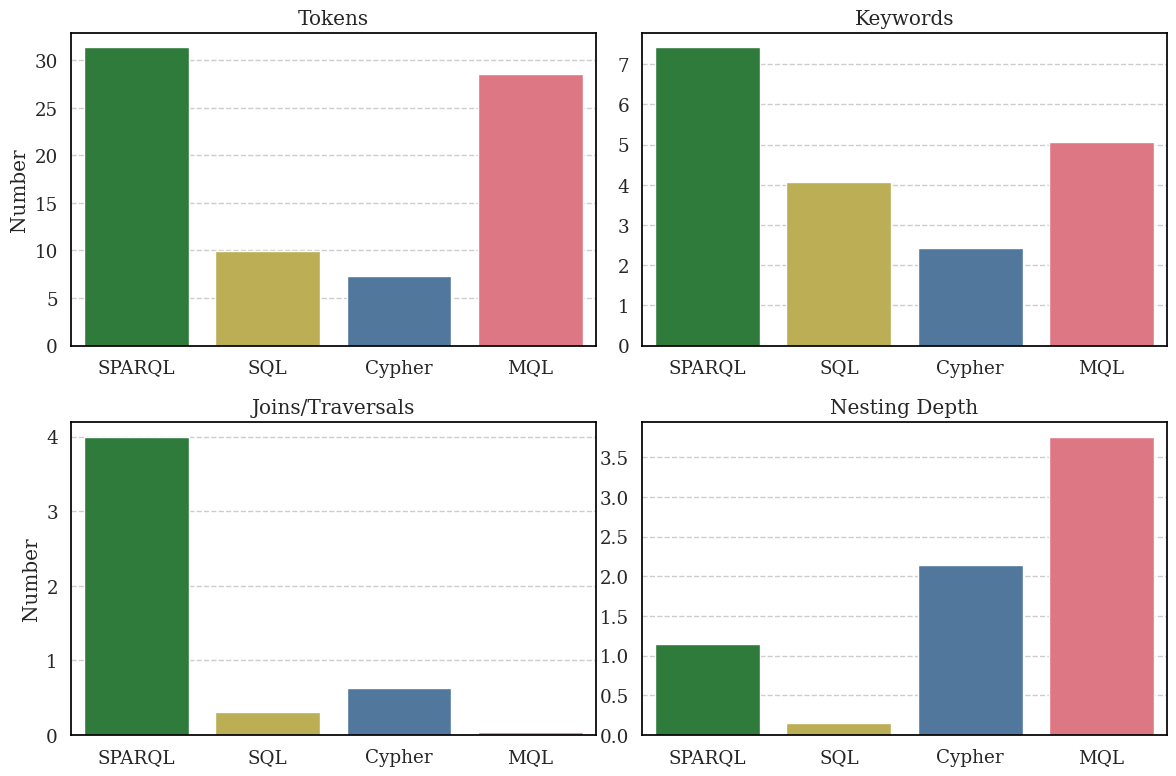

In [45]:
# plot_bars(df, y_list=["tokens", "keywords", "joins_traversals", "nesting_level", 'filters',
#        'aggregations', 'sorting_limiting', 'projections', 'complexity_score'])
df['query_language'] = df['query_language'].replace({'sparql': 'SPARQL',
                                 'sql': 'SQL',
                                 'cypher': 'Cypher',
                                 'mql': 'MQL'})
f = plot_bars(df, y_list=["Tokens", "Keywords", "Joins/Traversals", "Nesting Depth"])

In [46]:
f.savefig("HOOLLLLAA.pdf", bbox_inches='tight')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of characteristics to plot
characteristics = ['distinct_vars', 'tokens', 'keywords', 'joins_traversals', 'nesting_level']

# Define a color palette for the query languages
language_palette = {'sql': 'blue', 'cypher': 'green', 'sparql': 'red', 'mql': 'orange'}

# Create a grid of plots, one for each characteristic
g = sns.catplot(x='query_language', y='value', col='characteristic', col_wrap=3, kind='box',
                data=df.melt(id_vars=['query_language'], value_vars=characteristics, var_name='characteristic'),
                height=4, aspect=1.2, palette=language_palette)

# Set the plot titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Query Language", "Value")

# Rotate the x-tick labels for better readability
g.set_xticklabels(rotation=45)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['distinct_vars', 'tokens', 'keywords', 'joins_traversals', 'nesting_level']"

In [ ]:
# Boxplot data
data_to_plot = {
    'Query Length': {
        'Cypher': df['cypher'].str.len(),
        'SPARQL': df['sparql'].str.len(),
        'SQL': df['sql'].str.len(),
        'MQL': df['mql'].str.len()
    },
    'Number of Tokens': {
        'Cypher': df['cypher_tokens'],
        'SPARQL': df['sparql_tokens'],
        'SQL': df['sql_tokens'],
        'MQL': df['mql_tokens']
    },
    'Number of Keywords': {
        'Cypher': df['cypher_keywords'],
        'SPARQL': df['sparql_keywords'],
        'SQL': df['sql_keywords'],
        'MQL': df['mql_keywords']
    },
    'Average Query Time in (s)': {
        'SQL': df['sql_query_time'],
        'Cypher': df['cypher_query_time'],
        'SPARQL': df['sparql_query_time'],
        'MQL': df['mql_query_time']
    }
}

query_languages = ['Cypher', 'SPARQL', 'SQL', 'MQL']

query_language_colors = {
    'Cypher': [0.984375, 0.7265625, 0],
    'SPARQL': 'firebrick',
    'SQL': 'darkolivegreen'
}


KeyError: 'cypher'

In [ ]:
# Call the plotting function
plot_comparison(data_to_plot)